In [ ]:
pip install torch torchvision


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.3 MB/s eta 0:00:00


In [ ]:
!pip install seaborn

In [ ]:
pip install tqdm

# Importing libraries and ***packages***

In [ ]:
import numpy as np
from sklearn import datasets
from torchvision.datasets import CIFAR10
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import copy
import numpy as np
import pandas as pd
from tqdm import tqdm
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

import seaborn as sns
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

In [ ]:
torch.manual_seed(42)


# Choosing device configuration

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Importing the CIFAR-10 dataset

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])

# Download and import the CIFAR-10 dataset
train_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform)


100%|██████████| 170498071/170498071 [00:04<00:00, 41485321.79it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


# Size of training  and testing set

In [ ]:
print(len(train_dataset),len(test_dataset))

50000 10000


# Making data loaders for training and testing set

In [ ]:
batch_size=128
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)

test_loader = DataLoader(test_dataset, batch_size, shuffle=True)

In [ ]:
images, _ = next(iter(train_loader))

# Displaying sample images of datset

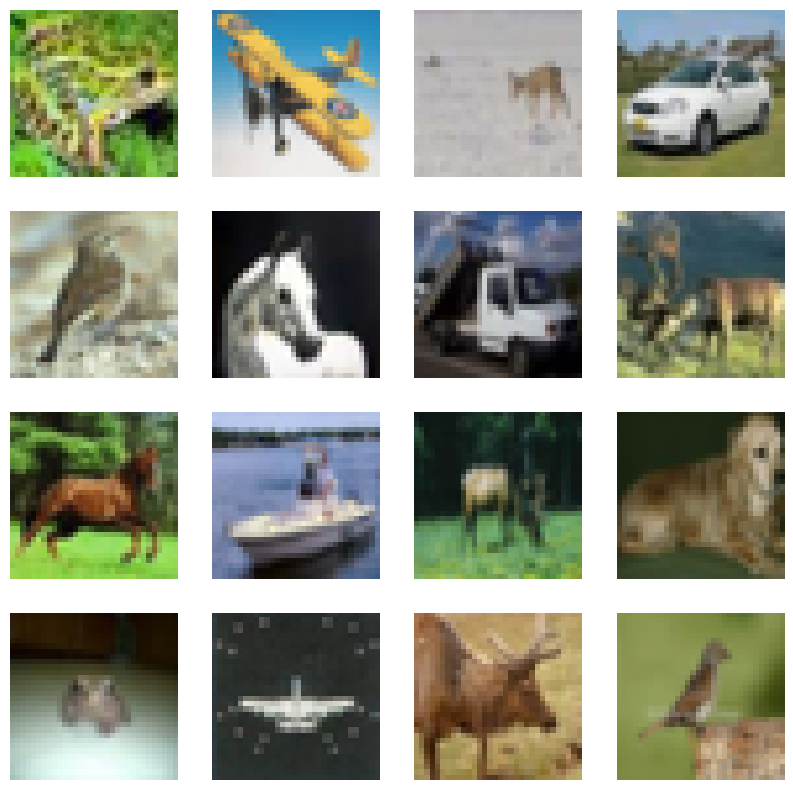

In [ ]:
# Display a grid of images
num_images = 16  # Adjust as needed
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].permute(1, 2, 0).numpy())  # Rearrange dimensions for imshow
    plt.axis('off')
plt.show()


# Certain Images before applying the model

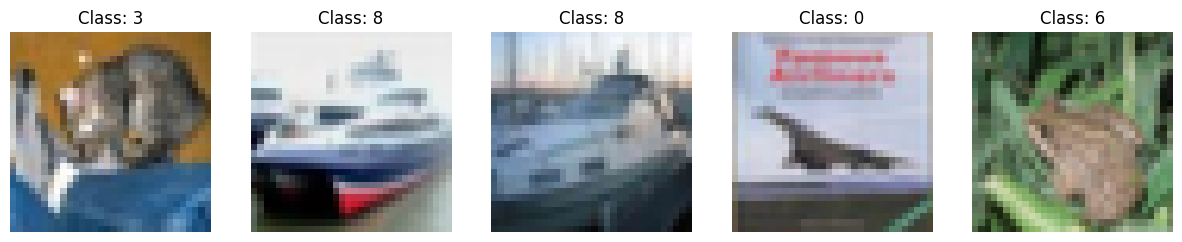

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    image, label = test_dataset[i]
    axes[i].imshow(image.permute(1, 2, 0))  # Rearrange dimensions for Matplotlib display
    axes[i].set_title(f'Class: {label}')
    axes[i].axis('off')
plt.show()

# Architecture of the model

In [ ]:
class My_net(nn.Module):
    def __init__(self):
        super(My_net, self).__init__()

        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.LeakyReLU() ,
            torch.nn.AdaptiveAvgPool2d(1)
            )
        self.layer2 = None


        self.linear = torch.nn.Linear(32, 10)

    def forward(self, x):
        # Forward pass through layer1
        x = self.layer1(x)

        # If layer2 is added, apply it
        if self.layer2 is not None:
            x = self.layer2(x)


        # Flatten the output for the linear layer
        x = x.view(x.size(0), -1)

        # Forward pass through linear_1
        x = self.linear(x)

        return x
model = My_net()

# Defining optimizer and loss function

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.015)
criterion = nn.CrossEntropyLoss()


# Function for freezing and unfreezing certain layers

In [ ]:

def freeze_layer(layer):
    for param in layer.parameters():
        param.requires_grad = False

def unfreeze_layer(layer):
    for param in layer.parameters():
        param.requires_grad = True


# Number of epochs and lists to store training loss and epoch numbers

In [ ]:
num_epochs = 10
losses = []

# Training the model on training set for layer 1

In [ ]:
best_loss = float('inf')
for epoch in range(num_epochs):
    epoch_loss = 0.0
    for data in train_loader:
        inputs, labels = data

        optimizer.zero_grad()
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()
        epoch_loss += loss.item()

    # Calculate average loss for the epoch
    avg_epoch_loss = epoch_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}')
    losses.append(avg_epoch_loss)
    if avg_epoch_loss < best_loss:
        best_loss = avg_epoch_loss
        # Save the current model state
        torch.save(model.state_dict(), 'best_model.pth')



Epoch [1/10], Loss: 2.0701
Epoch [2/10], Loss: 1.9496
Epoch [3/10], Loss: 1.8697
Epoch [4/10], Loss: 1.8220
Epoch [5/10], Loss: 1.7840
Epoch [6/10], Loss: 1.7620
Epoch [7/10], Loss: 1.7440
Epoch [8/10], Loss: 1.7322
Epoch [9/10], Loss: 1.7231
Epoch [10/10], Loss: 1.7150


# Plotting loss curve on training data

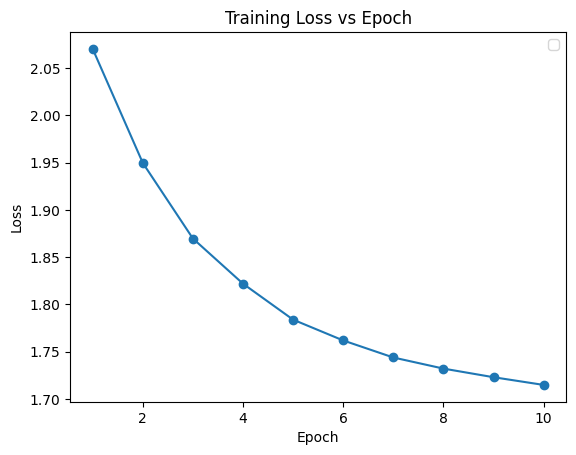

In [ ]:
plt.plot(range(1, num_epochs + 1), losses, marker='o')
plt.title('Training Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Adding layer 2 in the model

In [ ]:
model.layer2 = nn.Sequential(
    nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
    nn.ELU(),
    nn.AdaptiveAvgPool2d(1)
)
model.linear = nn.Linear(16, 10)
freeze_layer(model.layer1)

# Training the updated model on training set

In [ ]:
best_loss = float('inf')
num_epochs=6
optimizer = optim.Adam(model.parameters(), lr=0.015)
criterion = nn.CrossEntropyLoss()
best_loss = float('inf')
losses=[]
for epoch in range(num_epochs):
    epoch_loss = 0.0
    for data in train_loader:
        inputs, labels = data

        optimizer.zero_grad()
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()
        epoch_loss += loss.item()

    # Calculate average loss for the epoch
    avg_epoch_loss = epoch_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}')
    losses.append(avg_epoch_loss)
    if avg_epoch_loss < best_loss:
        best_loss = avg_epoch_loss
        # Save the current model state
        torch.save(model.state_dict(), 'best_model.pth')

Epoch [1/6], Loss: 1.7192
Epoch [2/6], Loss: 1.6804
Epoch [3/6], Loss: 1.6616
Epoch [4/6], Loss: 1.6480
Epoch [5/6], Loss: 1.6398
Epoch [6/6], Loss: 1.6321


# Plotting the loss function

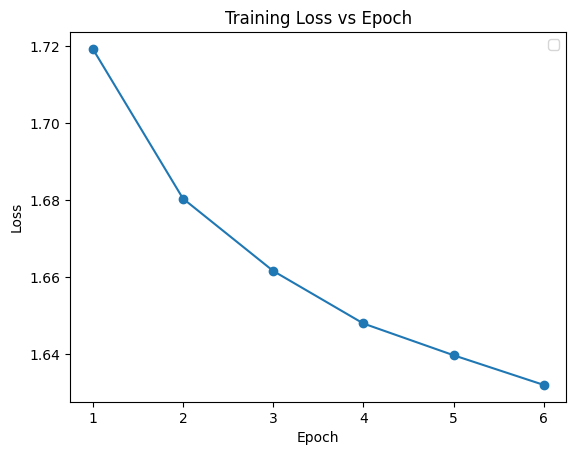

In [ ]:
plt.plot(range(1, num_epochs + 1), losses, marker='o')
plt.title('Training Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Unfreezing all the layers

In [ ]:
unfreeze_layer(model.layer1)
unfreeze_layer(model.layer2)

# Evaluating the model

In [ ]:
model.eval()

My_net(
  (layer1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): AdaptiveAvgPool2d(output_size=1)
  )
  (linear): Linear(in_features=16, out_features=10, bias=True)
  (layer2): Sequential(
    (0): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ELU(alpha=1.0)
    (2): AdaptiveAvgPool2d(output_size=1)
  )
)

# Displaying of certaing images with accuracy after training the model

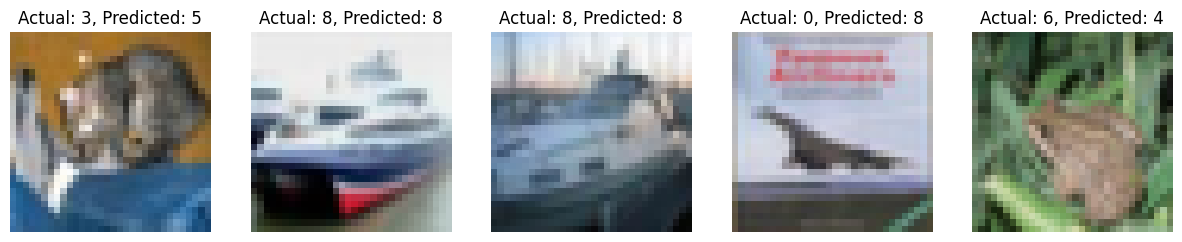

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    image, label = test_dataset[i]
    prediction = model(image.unsqueeze(0))  # Assuming batch size of 1
    predicted_class = torch.argmax(prediction).item()

    axes[i].imshow(image.permute(1, 2, 0))
    axes[i].set_title(f'Actual: {label}, Predicted: {predicted_class}')
    axes[i].axis('off')
plt.show()

# Fining T-SNE loss

In [ ]:

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns



# Lists to store true labels and features for T-SNE
true_labels = []
features = []
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)  # Use the output of layer1 for T-SNE
        features.extend(outputs.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())
features = np.array(features)
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=true_labels, palette='viridis', legend='full')
plt.title('T-SNE Visualization')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), losses, marker='o')
plt.title('Training Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


# Finding accuracy of the model

In [ ]:
# Calculate accuracy
from sklearn.metrics import accuracy_score, confusion_matrix

true_labels = []
predicted_labels = []
# Iterate through the test dataset
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)

        # Get predicted labels
        _, predicted = torch.max(outputs, 1)

        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())



Test Accuracy: 40.06%


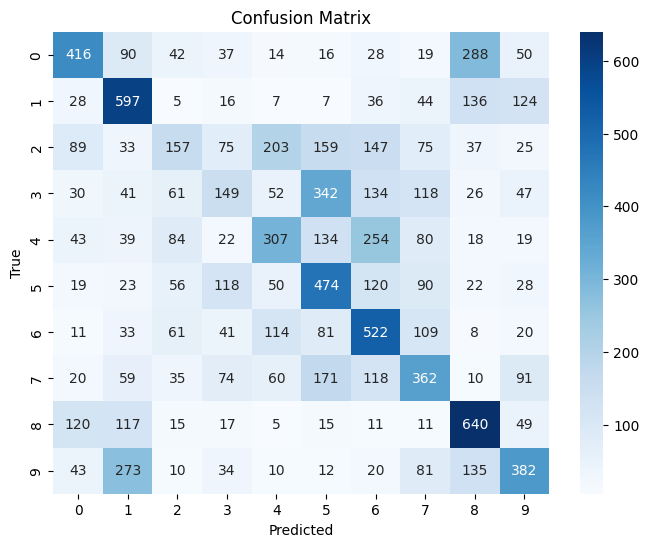

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Build confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

